In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
class ObesityDummyEncoder:
    
    def __init__(self):
        self.transform_matrix = {
            'male': 0,
            'female': 1,
            'no': 0,
            'yes': 1,
            'sometimes': 1,
            'frequently': 2,
            'always': 3
        }
        self.inverse_transform_matrix = {
            'Gender': {
                0: 'Male',
                1: 'Female'
            },
            'family_history_with_overweight': {
                0: 'no',
                1: 'yes'
            },
            'FAVC': {
                0: 'no',
                1: 'yes'
            },
            'SMOKE': {
                0: 'no',
                1: 'yes'
            },
            'CAEC': {
                0: 'no',
                1: 'Sometimes',
                2: 'Frequently',
                3: 'Always'
            },
            'SCC': {
                0: 'no',
                1: 'yes'
            },
            'CALC': {
                1: 'Sometimes',
                2: 'Frequently'
            }
        }
    
    def transfrom(self, x):
        return self.transform_matrix[x.lower()]
    
    def inverse_transform(self, x, column):
        return self.inverse_transform_matrix[column][x.lower()]

In [3]:
df = pd.read_csv('../data/ObesityDataSet_raw_and_data_sinthetic.csv')
df = df.drop(['Height', 'Weight'], axis=1)

In [4]:
dummy_encoder = ObesityDummyEncoder()
df_num = df.copy()

for i in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC']:
    df_num[i] = df[i].apply(dummy_encoder.transfrom)

In [5]:
MTRANS_transfomer = lambda x: {'Walking': 0,
                               'Public_Transportation': 1,
                               'Bike': 2,
                               'Motorbike': 3,
                               'Automobile': 4,}[x]
df_num['MTRANS'] = df_num['MTRANS'].apply(MTRANS_transfomer)

NObeyesdad_transfomer = lambda x: {'Insufficient_Weight': 0,
                                   'Normal_Weight': 1,
                                   'Overweight_Level_I': 2,
                                   'Overweight_Level_II': 3,
                                   'Obesity_Type_I': 4,
                                   'Obesity_Type_II': 5,
                                   'Obesity_Type_III': 6}[x]
df_num['NObeyesdad'] = df_num['NObeyesdad'].apply(NObeyesdad_transfomer)

df_num

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,1
1,1,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,1
2,0,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,1,1
3,0,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,2
4,0,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,1,6
2107,1,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,1,6
2108,1,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,1,6
2109,1,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,1,6


In [6]:
df_num_rl = df_num.iloc[:498]  # real people
df_num_rl.tail()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
493,0,20.0,0,1,2.0,3.0,2,0,1.0,0,2.0,0.0,1,3,1
494,1,18.0,0,1,3.0,3.0,1,0,2.0,0,0.0,0.0,1,1,1
495,0,19.0,1,1,3.0,1.0,3,0,1.0,1,0.0,0.0,0,3,1
496,0,18.0,1,1,2.0,3.0,1,0,2.0,0,0.0,2.0,1,1,0
497,0,20.0,0,0,2.0,3.0,1,0,2.0,0,1.0,1.0,1,1,1


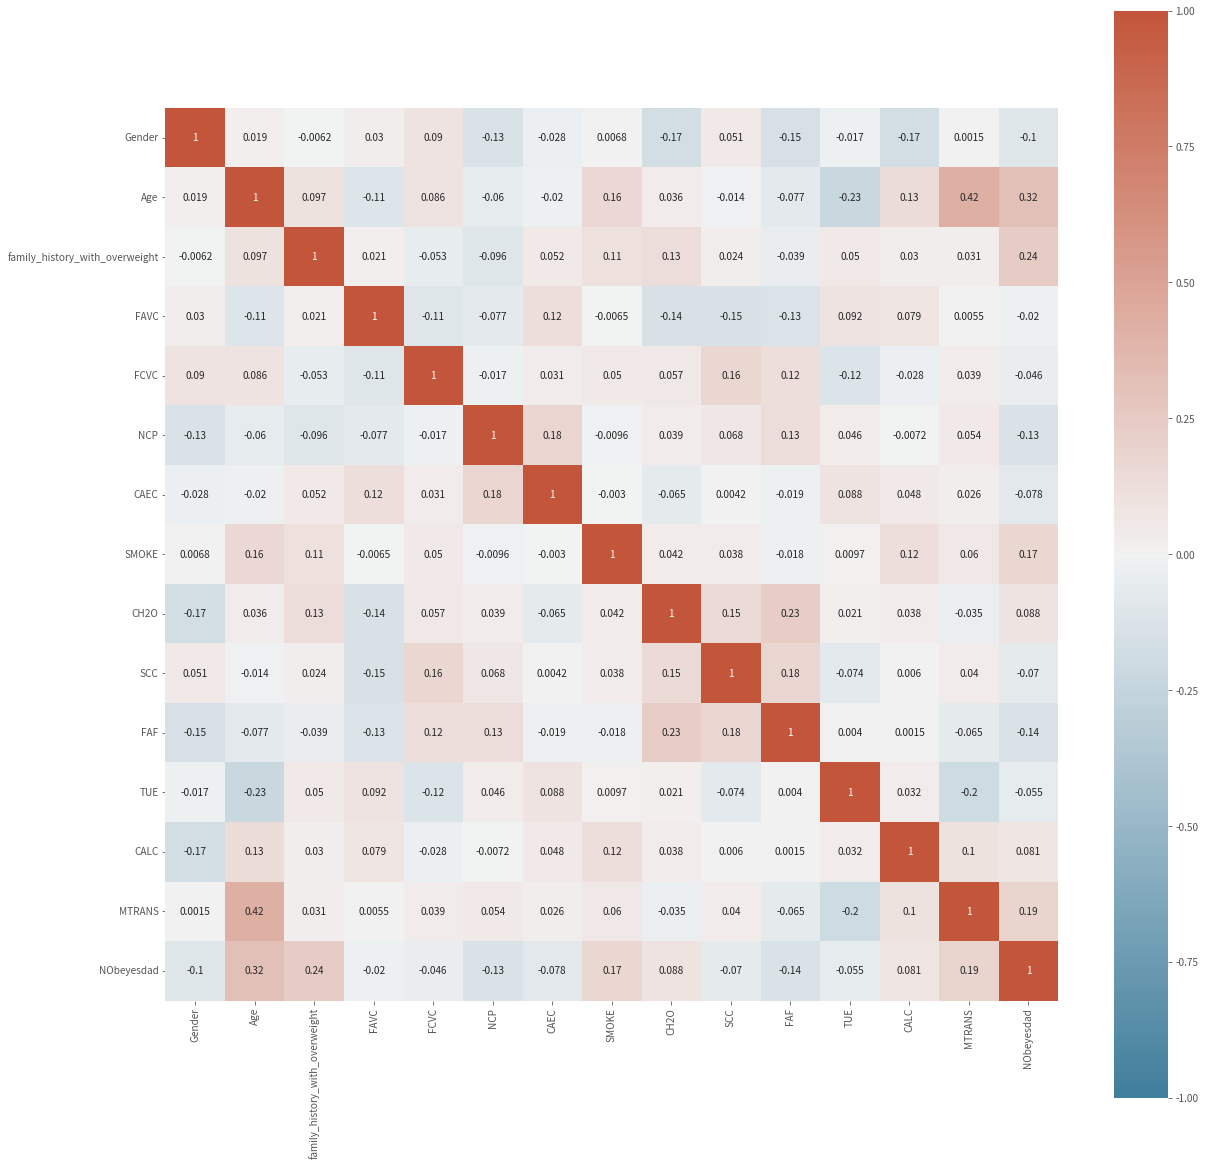

In [7]:
plt.figure(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_num_rl.corr(), annot=True, robust=1, square=1, cmap=cmap, vmin=-1, vmax=1);

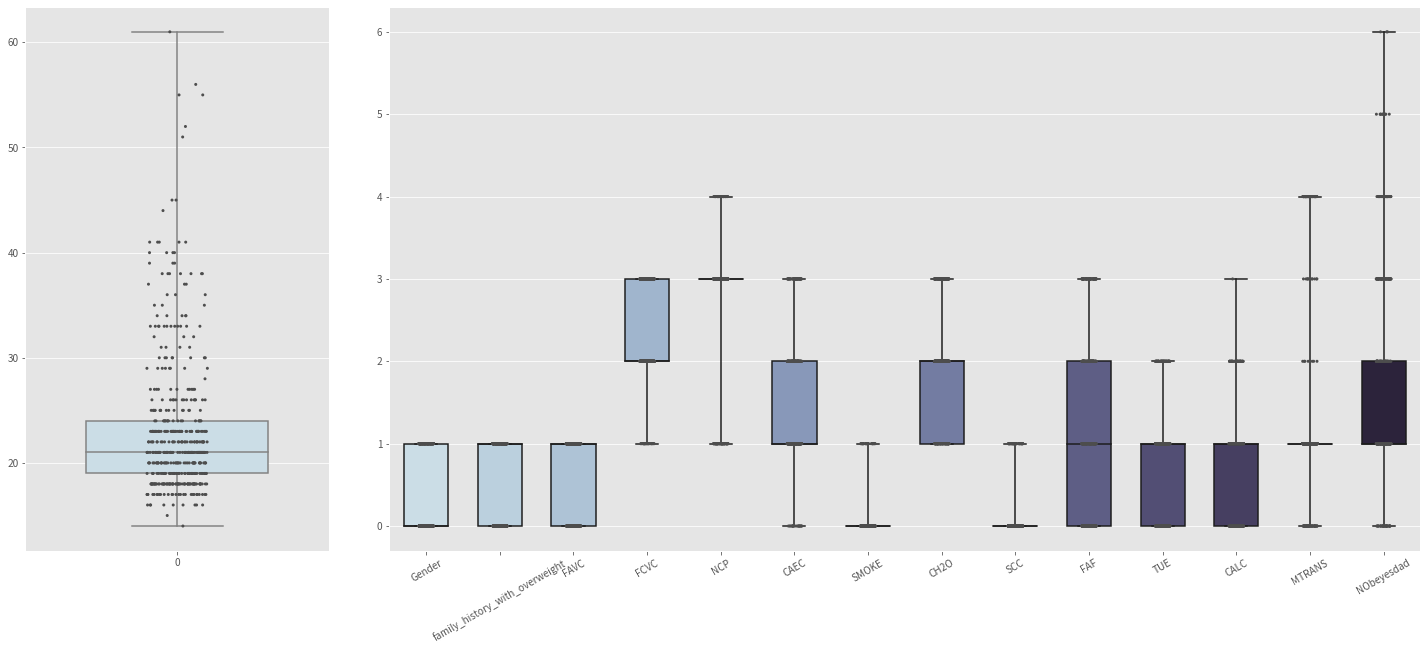

In [8]:
plt.figure(figsize=(25, 10))

palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

ax = plt.subplot(1, 4, 1)
sns.boxplot(data=df_num_rl['Age'], whis=[0, 100], width=.6, palette="ch:s=.25,rot=-.25")
sns.stripplot(data=df_num_rl['Age'], size=3, color=".3", linewidth=0)

ax = plt.subplot(1, 4, (2, 4))
plt.xticks(rotation=30)
sns.boxplot(data=df_num_rl.drop('Age', axis=1), whis=[0, 100], width=.6, palette="ch:s=.25,rot=-.25")
sns.stripplot(data=df_num_rl.drop('Age', axis=1), size=3, color=".3", linewidth=0);

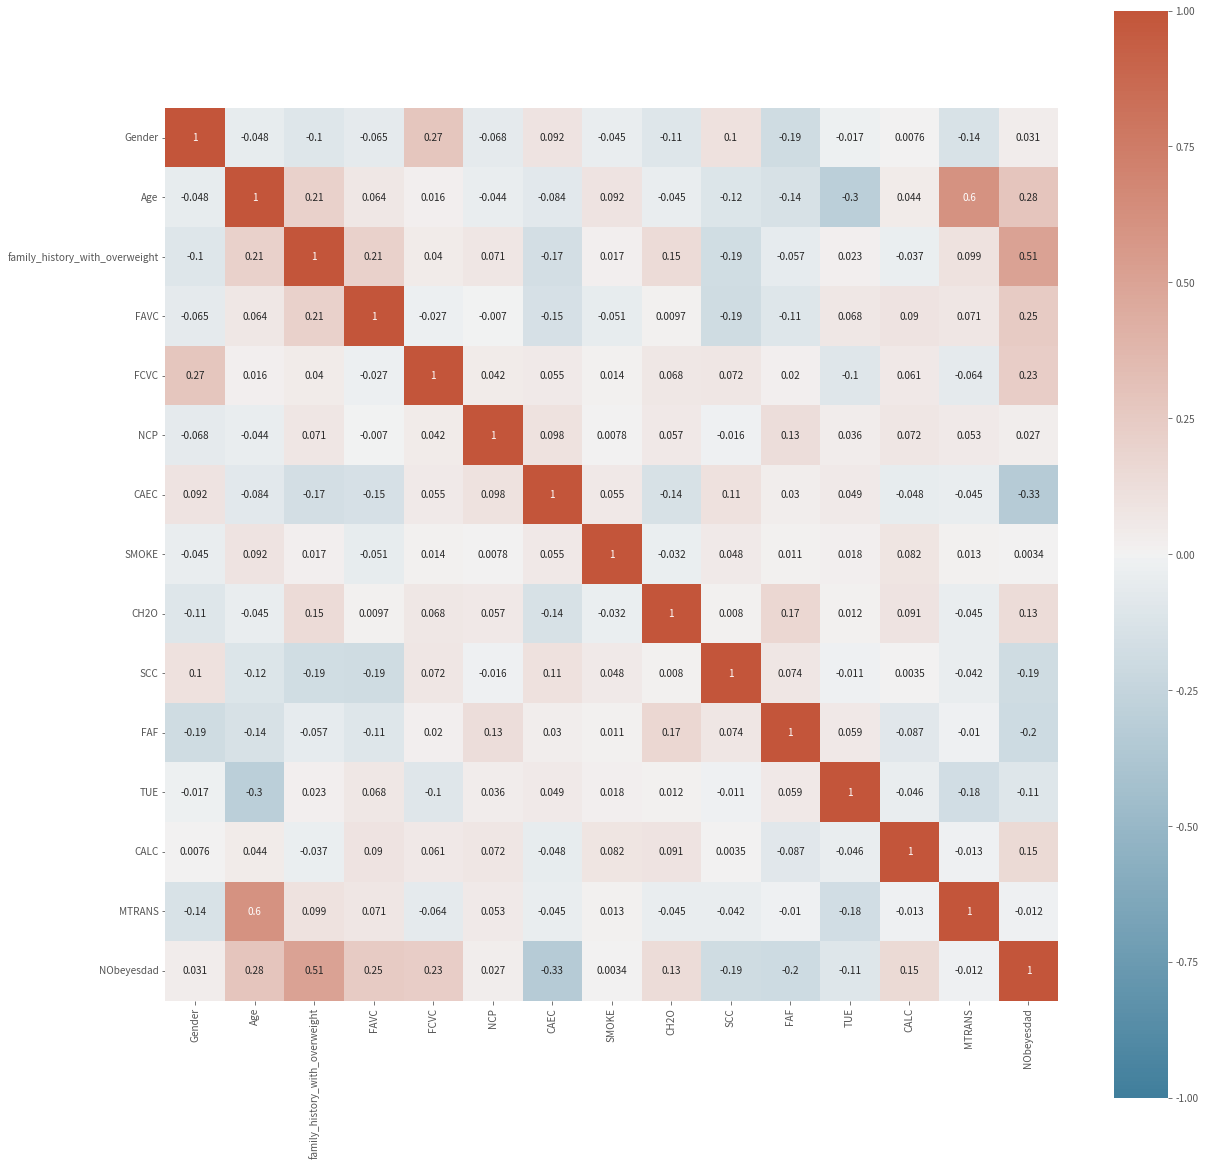

In [9]:
plt.figure(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_num.corr(), annot=True, robust=1, square=1, cmap=cmap, vmin=-1, vmax=1);

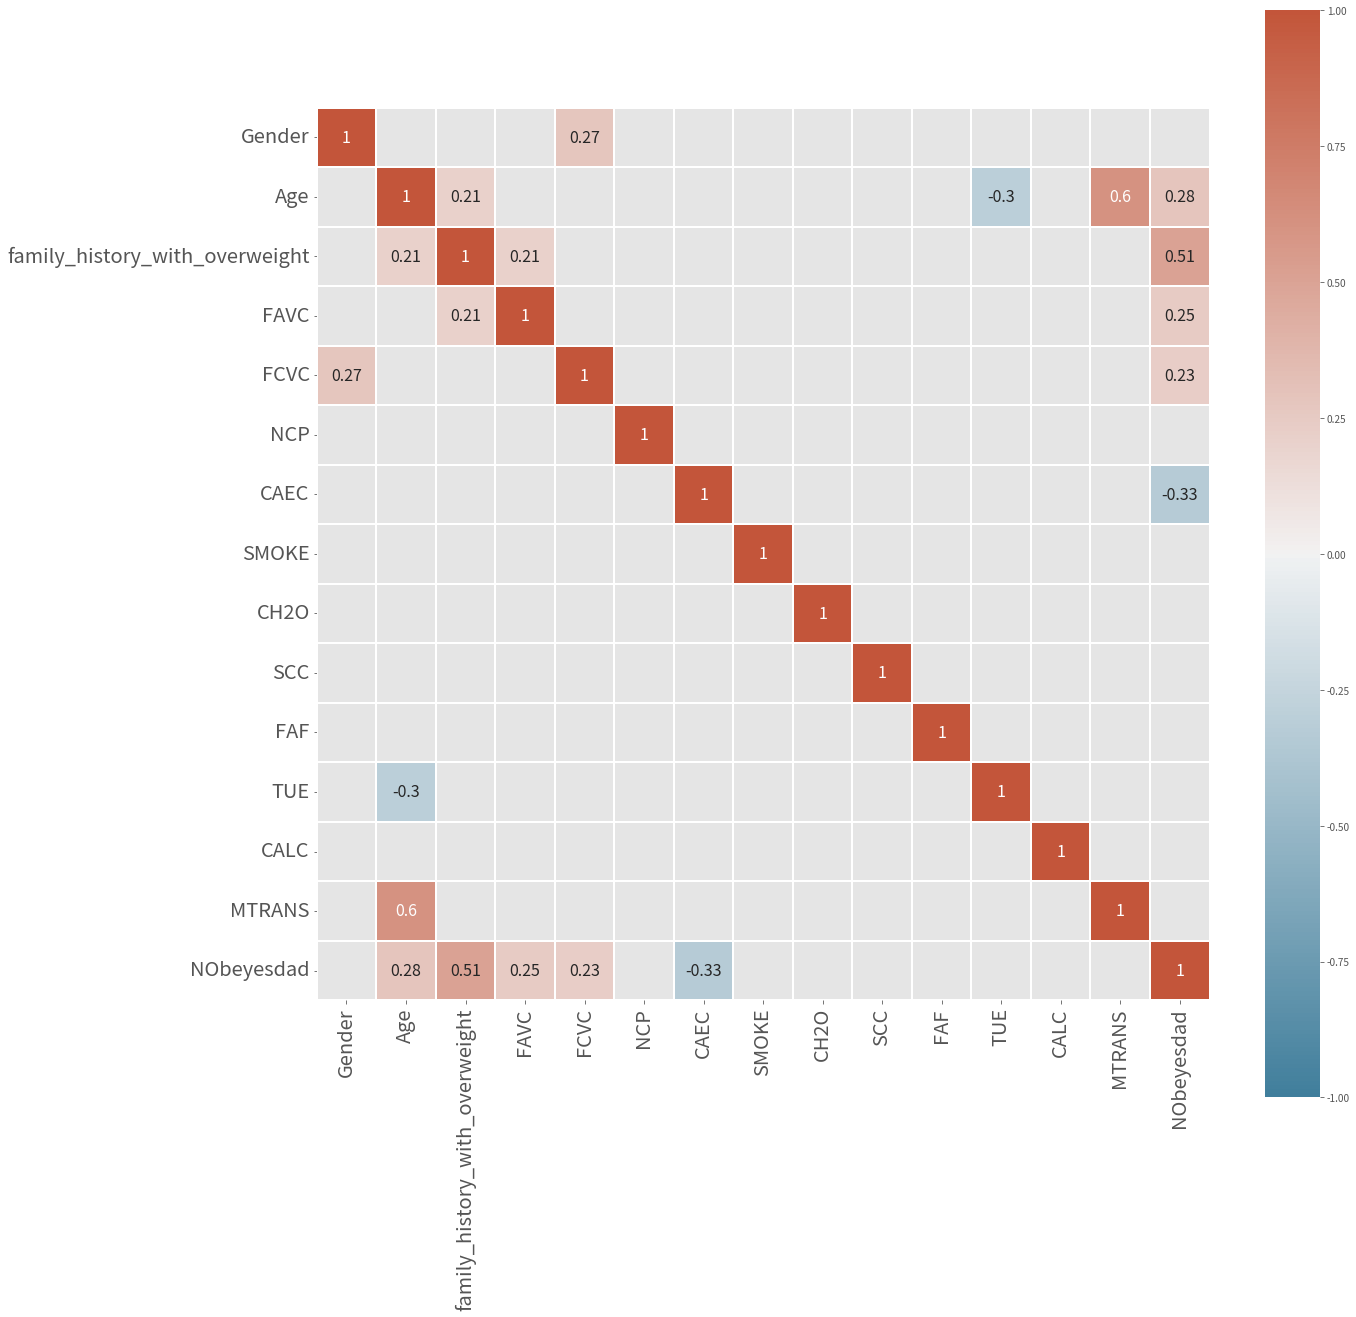

In [10]:
df2corr = df_num.corr()
df2_high_corr = (df2corr[df2corr >= .2].fillna(0) + df2corr[df2corr <= -.2].fillna(0)).replace(0, np.nan)

plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df2_high_corr, annot=True, square=True, cmap=cmap, vmin=-1, vmax=1, annot_kws={'size': 16}, linewidths=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

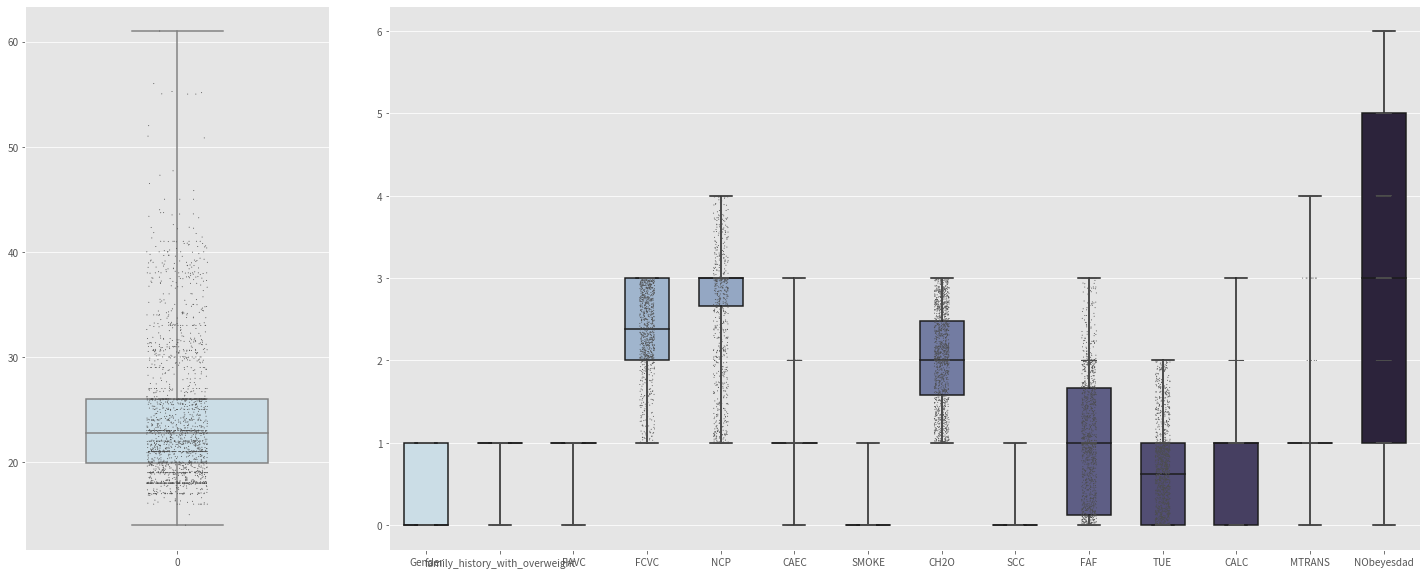

In [11]:
plt.figure(figsize=(25, 10))

palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

ax = plt.subplot(1, 4, 1)
sns.boxplot(data=df_num['Age'], whis=[0, 100], width=.6, palette="ch:s=.25,rot=-.25")
sns.stripplot(data=df_num['Age'], size=1, color=".3", linewidth=0)

ax = plt.subplot(1, 4, (2, 4))
sns.boxplot(data=df_num.drop('Age', axis=1), whis=[0, 100], width=.6, palette="ch:s=.25,rot=-.25")
sns.stripplot(data=df_num.drop('Age', axis=1), size=1, color=".3", linewidth=0);

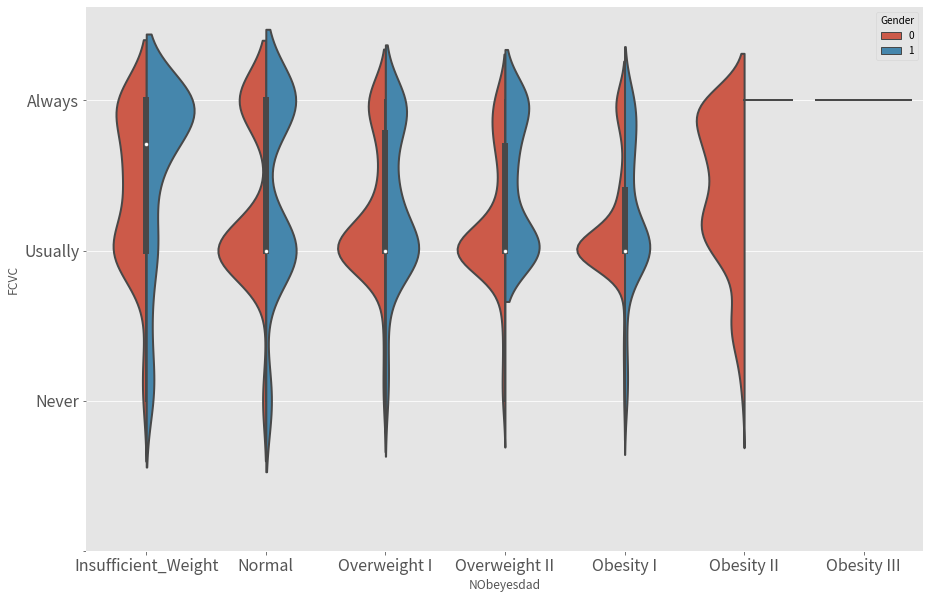

In [12]:
plt.figure(figsize=(15, 10))

sns.violinplot(data=df_num, y="FCVC", x="NObeyesdad", hue="Gender", split=True, linewidth=2)
sns.despine(left=True)
plt.xticks(ticks=range(7), labels=['Insufficient_Weight', 'Normal', 'Overweight I', 'Overweight II', 
                                   'Obesity I', 'Obesity II', 'Obesity III'], fontsize=16)
plt.yticks(ticks=range(4), labels=[ '','Never', 'Usually', 'Always'], fontsize=16);